In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [3]:
data = pd.read_csv('stmodel2_kw_combinations_frequency.txt', sep='\t' )

In [4]:
data.head()

,year,kw_combined,num_kw fr
0,1989,kw_10033_kw_11367,1
1,1989,kw_10033_kw_12359,1
2,1989,kw_10033_kw_5763,1
3,1989,kw_10033_kw_7964,1
4,1989,kw_10033_kw_9512,1


In [186]:
data = data['num_kw fr']

In [187]:
data.describe()

count    1.513518e+06
mean     1.492252e+00
std      3.292360e+00
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      5.200000e+02
Name: num_kw fr, dtype: float64

[]

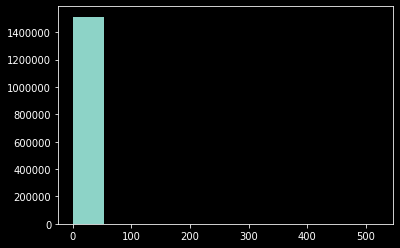

In [188]:
plt.hist(data)
plt.plot()

In [203]:
y = data.value_counts()
y.values

array([1251294,  148202,   47248,   22015,   12247,    7654,    5090,
          3639,    2738,    2003,    1715,    1289,    1082,     843,
           723,     545,     498,     425,     395,     334,     300,
           253,     209,     192,     174,     170,     166,     146,
           121,     106,     102,      89,      82,      77,      65,
            65,      52,      51,      47,      44,      42,      41,
            39,      38,      38,      37,      35,      35,      34,
            27,      26,      26,      24,      22,      22,      19,
            19,      18,      16,      15,      15,      15,      14,
            14,      12,      12,      12,      11,      10,      10,
             9,       9,       9,       9,       8,       8,       7,
             7,       7,       6,       6,       5,       5,       5,
             5,       5,       4,       4,       4,       4,       4,
             4,       4,       3,       3,       3,       3,       3,
             3,     

## первые мысли:  
распределение странное, очень много значений меньше 100 потом почти одни единички . скорее всего лучше всего зайдет пуассоновское распределение(а это распределение даже не понятно как виуализировать) . 
Для визуализации можно попробовать отбросить значения с единичками, тогда гистограмма может быть будет отличаться от одного столбика

## нормализация
Перед работой с данными нормализуем их, чтобы гиcтограмма выражала распределение.   
Я решил сделать это так(в итоге сумма значений=1, что и требуется для восстановления плотности): 
$$y'_i = \frac{y_i}{\sum_i y_i}$$  
В дальнейшем будем работать с нормализованными данными

In [191]:
y = y/np.sum(y)

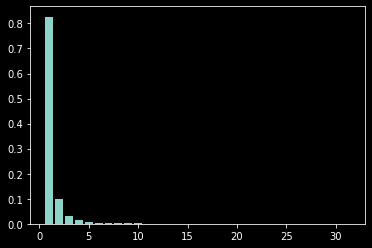

In [60]:
plt.bar(x=y.index[:n],height=y.values[:n])
plt.show()

In [202]:
sum(y[:10])

0.9924758080181405

### Пуассоновское распределение
Попробуем найти параметры распределения Пуассона с помощью метода максимума правдоподобия.

In [231]:
from scipy.stats import *

In [ ]:
def log_likelihood():
    

## Непрерывные распределения

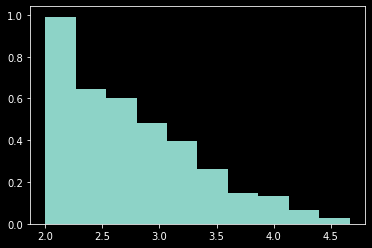

In [149]:
from scipy.stats import beta
a, b = 1., 3.
x = beta.rvs(a, b, 2, 3, size=1000)

plt.hist(x, density=True)
plt.show()

In [205]:
x = np.sort(data.values)
x

array([  1,   1,   1, ..., 481, 484, 520])

In [215]:
params = st.gamma.fit(x)
params

(0.0017337609904350452, 0.9999999999999998, 1.5633042912523676)

In [228]:
rv.pdf(500)

8.331718914153503e-145

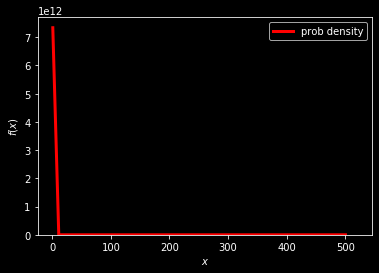

In [212]:
xx = np.linspace(1, 500)
rv = st.gamma(*params)
yy = rv.pdf(xx)


plt.plot(xx, yy, 'r-', lw=3, label='prob density')
plt.hist(x, density=True, alpha=0.3)
# plt.bar(x=y.index[:n], height=y.values[:n],alpha=0.3)
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.legend()
plt.show()

(0.0017337609904350452, 0.9999999999999998, 1.5633042912523676)


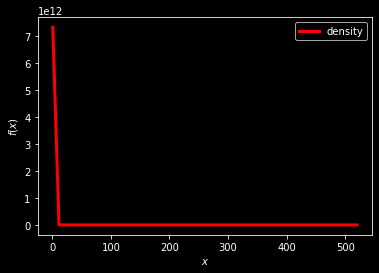

In [232]:
n=1500000
dist = st.gamma
params = dist.fit(x)
print(params)

xx = np.linspace(min(x), max(x))
rv = dist(*params)
yy = rv.pdf(xx)


plt.plot(xx, yy, 'r-', lw=3, label='density')
# plt.bar(x=y.index[:n], height=y.values[:n],alpha=0.3)
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.legend()
plt.show()

In [233]:
kstest(x, dist.cdf, params)

KstestResult(statistic=0.9396315545759, pvalue=0.0)